In [1]:
import numpy as np
from myst_nb import glue

from scipy.stats import norm
from scipy.stats import beta
import matplotlib.pyplot as plt
import pandas as pd

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

/mnt/c/projects/Code/bayes-missing-manual/bayes-venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


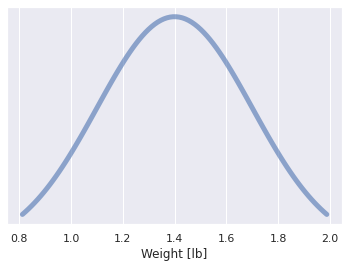

In [2]:
m = 1.4 # mean
s = 0.3 # standard deviation

x = np.linspace(norm.ppf(0.025, loc=m, scale=s), norm.ppf(0.975, loc=m, scale=s), 100)
y = norm.pdf(x, loc=m, scale=s)
z = y/sum(y)
fig, ax = plt.subplots(1, 1)
ax.plot(x, z, lw=5, alpha=0.6, label='norm pdf')
# ax.plot(x, z, lw=0.1, alpha=0.6, label='norm pdf', marker = '.',markersize=10)
ax.set_xlabel('Weight [lb]');
# ax.set_ylabel('Probability Mass');
ax.get_yaxis().set_visible(False);

glue('bread-weight-pdf',fig, display=False)
glue("mean-bread", m, display=False)
glue("std-bread", s, display=False)

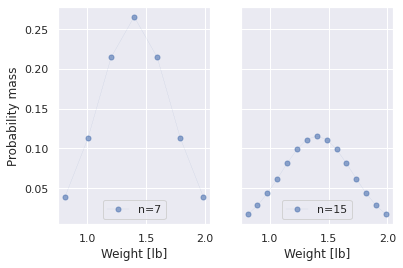

In [3]:
n1 = 7
n2 = 15

x = np.linspace(norm.ppf(0.025, loc=m, scale=s), norm.ppf(0.975, loc=m, scale=s), n1)
y = norm.pdf(x, loc=m, scale=s)
z = y/sum(y)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.plot(x, z, lw=5, alpha=0.6, label='norm pdf')
ax1.plot(x, z, lw=0.1, alpha=0.6, label=f'n={n1}', marker = '.',markersize=10)
ax1.set_xlabel('Weight [lb]');
ax1.set_ylabel('Probability mass');
ax1.legend(loc='lower center')

x = np.linspace(norm.ppf(0.025, loc=m, scale=s), norm.ppf(0.975, loc=m, scale=s), n2)
y = norm.pdf(x, loc=m, scale=s)
z = y/sum(y)
ax2.plot(x, z, lw=0.1, alpha=0.6, label=f'n={n2}', marker = '.',markersize=10)
ax2.set_xlabel('Weight [lb]');
# ax.set_ylabel('Probability Mass');
# ax.get_yaxis().set_visible(False);
ax2.legend(loc='lower center')

glue('pmf-sm-lg',fig, display=False)
glue('n1',n1, display=False)
glue('n2',n2, display=False)

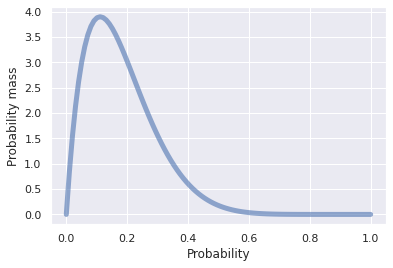

In [4]:
a = 2
b = 9
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, beta.pdf(x, a, b), lw=5, alpha=0.6, label='beta pdf')
ax.set_xlabel("Probability")
ax.set_ylabel('Probability mass');
# ax.get_yaxis().set_visible(False);

glue('beta-dist',fig, display=False)
glue("beta-ex-a", a, display=False)
glue("beta-ex-b", b, display=False)

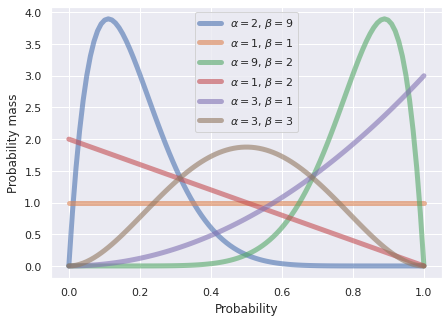

In [5]:
a1 = 2
b1 = 9

a2 = 1
b2 = 1

a3 = 9
b3 = 2

a4 = 1
b4 = 2

a5 = 3
b5 = 1

a6 = 3
b6 = 3

x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 1,figsize=(7,5))
ax.plot(x, beta.pdf(x, a1, b1), lw=5, alpha=0.6, label=r'$\alpha=2$, $\beta=9$')
ax.plot(x, beta.pdf(x, a2, b2), lw=5, alpha=0.6, label=r'$\alpha=1$, $\beta=1$')
ax.plot(x, beta.pdf(x, a3, b3), lw=5, alpha=0.6, label=r'$\alpha=9$, $\beta=2$')
ax.plot(x, beta.pdf(x, a4, b4), lw=5, alpha=0.6, label=r'$\alpha=1$, $\beta=2$')
ax.plot(x, beta.pdf(x, a5, b5), lw=5, alpha=0.6, label=r'$\alpha=3$, $\beta=1$')
ax.plot(x, beta.pdf(x, a6, b6), lw=5, alpha=0.6, label=r'$\alpha=3$, $\beta=3$')
ax.set_xlabel("Probability")
ax.set_ylabel('Probability mass');
# ax.get_yaxis().set_visible(False);
ax.legend()

glue('beta-dist-shapes',fig, display=False)


In [6]:
a_prior = 1
b_prior = 9
glue("a_prior", a_prior, display=False)
glue("b_prior", b_prior, display=False)

a_like = 3
b_like = 97
glue("a_like", a_like, display=False)
glue("b_like", b_like, display=False)

a_post = a_prior + a_like
b_post = b_prior + b_like
glue("a_post", a_post, display=False)
glue("b_post", b_post, display=False)


x = np.linspace(0, 1, 1000)

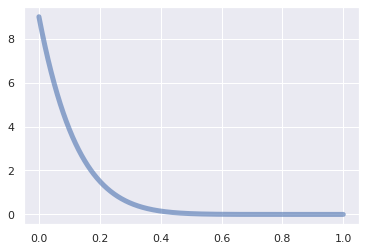

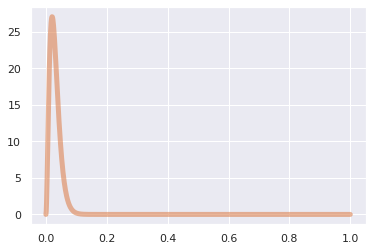

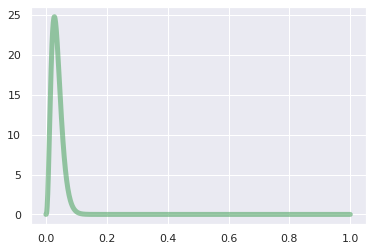

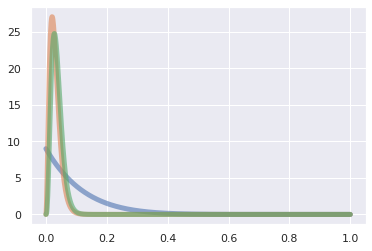

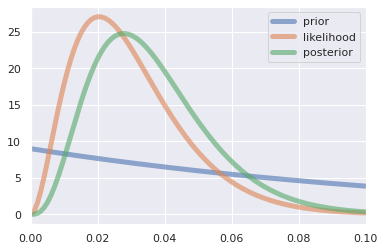

In [7]:
# prior
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a_prior, b_prior), lw=5, alpha=0.6, label='prior')

# likelihood
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a_like, b_like), color = sns.color_palette()[1], lw=5, alpha=0.6, label='likelihood')

# posterior
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a_post, b_post), color = sns.color_palette()[2], lw=5, alpha=0.6, label='posterior')

# all togehter
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a_prior, b_prior), lw=5, alpha=0.6, label='prior')
ax.plot(x, beta.pdf(x, a_like, b_like), color = sns.color_palette()[1], lw=5, alpha=0.6, label='likelihood')
ax.plot(x, beta.pdf(x, a_post, b_post), color = sns.color_palette()[2], lw=5, alpha=0.6, label='posterior')

# all togehter, zoom on details
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a_prior, b_prior), lw=5, alpha=0.6, label='prior')
ax.plot(x, beta.pdf(x, a_like, b_like), color = sns.color_palette()[1], lw=5, alpha=0.6, label='likelihood')
ax.plot(x, beta.pdf(x, a_post, b_post), color = sns.color_palette()[2], lw=5, alpha=0.6, label='posterior')
ax.set_xlim([0,0.1])
ax.legend()



In [8]:
def beta_mean(a,b):
    return a/(a+b)

Prior mean: 0.1
Likelihood mean: 0.03
Posterior mean: 0.03636363636363636


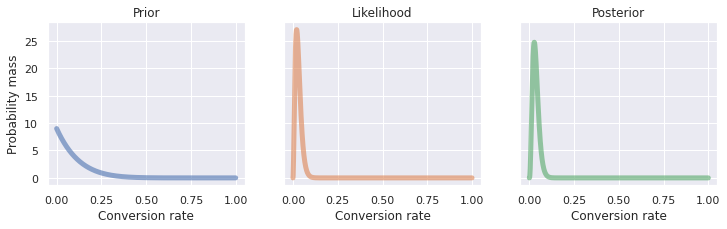

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3), sharey=True)
ax1.plot(x, beta.pdf(x, a_prior, b_prior), lw=5, alpha=0.6, label='prior')
ax1.set_title("Prior");
ax1.set_ylabel('Probability mass');
ax1.set_xlabel("Conversion rate")

ax2.plot(x, beta.pdf(x, a_like, b_like), color = sns.color_palette()[1], lw=5, alpha=0.6, label='likelihood')
ax2.set_title("Likelihood");
ax2.set_xlabel("Conversion rate")

ax3.plot(x, beta.pdf(x, a_post, b_post), color = sns.color_palette()[2], lw=5, alpha=0.6, label='posterior')
ax3.set_title("Posterior");
ax3.set_xlabel("Conversion rate")

glue('book-prior-like-post',fig, display=False)

mu_prior = beta_mean(a_prior,b_prior)
print(f'Prior mean: {mu_prior}')

mu_like = beta_mean(a_like,b_like)
print(f'Likelihood mean: {mu_like}')

mu_post = beta_mean(a_post,b_post)
print(f'Posterior mean: {mu_post}')

glue("mu_prior", mu_prior, display=False)
glue("mu_like", mu_like, display=False)
glue("mu_post", mu_post, display=False)

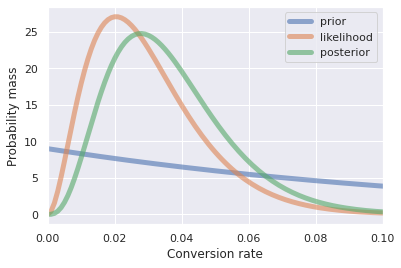

In [10]:
# all togehter, zoom on details
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a_prior, b_prior), lw=5, alpha=0.6, label='prior')
ax.plot(x, beta.pdf(x, a_like, b_like), color = sns.color_palette()[1], lw=5, alpha=0.6, label='likelihood')
ax.plot(x, beta.pdf(x, a_post, b_post), color = sns.color_palette()[2], lw=5, alpha=0.6, label='posterior')
ax.set_xlim([0,0.1])
ax.set_xlabel("Conversion rate")
ax.set_ylabel('Probability mass');
ax.legend()

glue('book-together',fig, display=False)

In [11]:
a_sexy = 1
b_sexy = 20

glue("a_sexy", a_sexy, display=False)
glue("b_sexy", b_sexy, display=False)

Posterior mean: 0.03636363636363636
Sexy mean: 0.047619047619047616


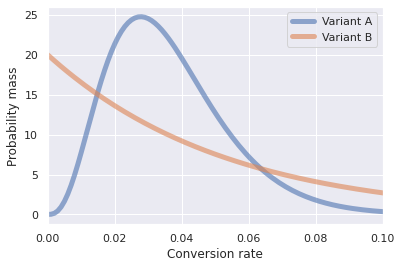

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a_post, b_post), lw=5, alpha=0.6, label='Variant A')
ax.plot(x, beta.pdf(x, a_sexy, b_sexy), lw=5, alpha=0.6, label='Variant B')
ax.set_xlim([0,0.1])
ax.set_xlabel("Conversion rate")
ax.set_ylabel("Probability mass")
ax.legend()

glue('A-B-distributions',fig, display=False)

mu_post = beta_mean(a_post,b_post)
print(f'Posterior mean: {mu_post}')

mu_sexy = beta_mean(a_sexy,b_sexy)
print(f'Sexy mean: {mu_sexy}')
glue("mu_sexy", mu_sexy, display=False)

N_original = a_post + b_post
glue("N_original", N_original, display=False)

N_sexy = a_sexy + b_sexy
glue("N_sexy", N_sexy, display=False)

N_diff = N_original - N_sexy
glue("N_diff", N_diff, display=False)

In [13]:
N = 10000
glue("N_samples", N, display=False)

varA = beta.rvs(a_post, b_post, size=N)
varB = beta.rvs(a_sexy, b_sexy, size=N)


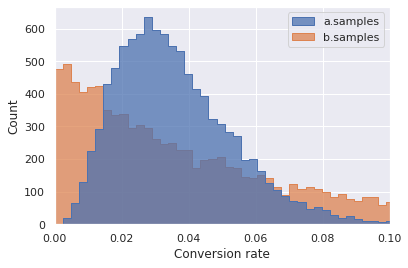

In [14]:
df = pd.DataFrame(data=varA)
df['varB'] = varB
df.columns = ['a.samples', 'b.samples']

fig, ax = plt.subplots(1,1)
sns.histplot(df, ax=ax, element="step").set(xlabel='Conversion rate', xlim=(0,0.1));
glue('A-B-Monte-Carlo',fig, display=False)

In [15]:
ratio = varB/varA

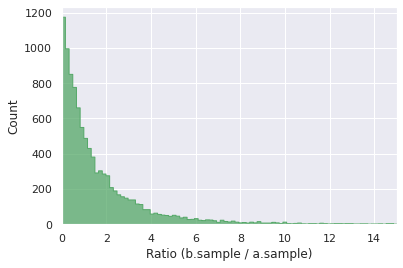

In [16]:
fig, ax = plt.subplots(1,1)
sns.histplot(ratio, ax=ax, element="step", color = sns.color_palette()[2]).set(xlim=(0,15), xlabel='Ratio (b.sample / a.sample)');
glue('A-B-Monte-Carlo-ratio',fig, display=False)

In [17]:
b_superior = sum(varB > varA)/N*100
glue('b_superior',b_superior, display=False)
glue('a_superior',100-b_superior, display=False)
b_superior

49.68

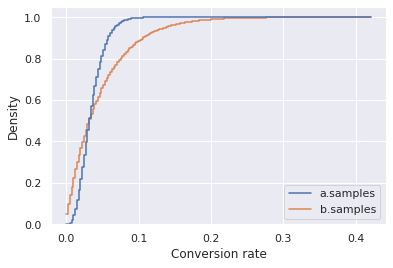

In [18]:
fig, ax = plt.subplots(1,1)
sns.histplot(df, ax=ax, element="step", fill=False, cumulative=True, stat="density",common_norm=False).set(xlabel='Conversion rate');
glue('A-B-CDF-varA-varB',fig, display=False)

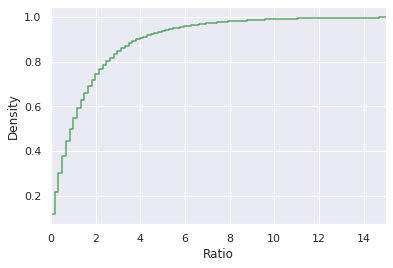

In [19]:
fig, ax = plt.subplots(1,1)
sns.histplot(ratio, ax=ax, element="step", fill=False, cumulative=True, stat="density", color = sns.color_palette()[2]).set(xlabel='Ratio', xlim=(0,15));
glue('A-B-CDF-ratio',fig, display=False)

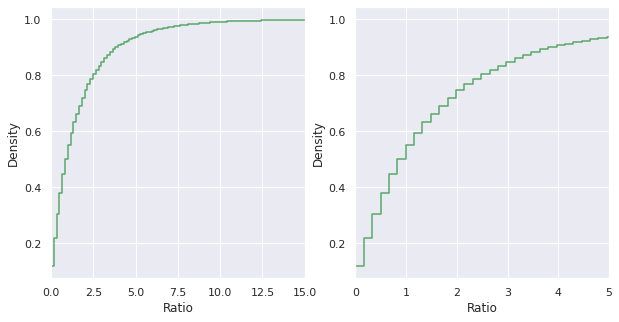

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

sns.histplot(ratio, element="step", ax = ax1, fill=False, cumulative=True, stat="density", color = sns.color_palette()[2]).set(xlabel='Ratio', xlim=(0,15));
sns.histplot(ratio, element="step", ax = ax2, fill=False, cumulative=True, stat="density", color = sns.color_palette()[2]).set(xlim=(0,5), xlabel='Ratio');

In [21]:
def gridMethod(theta, prior, H, T, fig_name):
    
    likelihood = theta**H * (1-theta)**T
    prior_like = prior * likelihood
    posterior = prior_like/np.sum(prior_like)
    
    print(':::{list-table} Caption goes here ')
    print(':header-rows: 1')
    print(':widths: auto')
    print(':name: <table name>')
    print('')

    print('* - $\\theta$')
    for x in theta:
        print(f'  - {x}')
    print(f'  - Sum')

    print('* - Prior')
    for x in prior:
        print(f'  - {x:2.2f}')
    print(f'  - {sum(prior):2.2f}')
    
    print('* - Likelihood')
    for x in likelihood:
        print(f'  - {x:2.2e}')
    print(f'  - {sum(likelihood):2.2e}')

    print('* - Prior x Likelihood')
    for x in prior_like:
        print(f'  - {x:2.1e}')
    print(f'  - {sum(prior_like):2.1e}')

    print('* - Posterior')
    for x in posterior:
        print(f'  - {x:2.2f}')
    print(f'  - {sum(posterior):2.2f}')
    
    print(':::')
    
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, figsize=(5,10))
    
    ax1.plot(theta,prior,'-o')
    ax1.set_title('Prior')
    ax1.set_ylabel("Probability mass")
    ax2.plot(theta,likelihood,'-o')
    ax2.set_title('Likelihood')
    ax2.set_ylabel("Probability mass")
    ax3.plot(theta,posterior,'-o')
    ax3.set_title('Posterior')
    ax3.set_ylabel("Probability mass")
    ax3.set_xlim(0,1)
    ax3.set_xlabel(r'$\theta$')
    
    glue(fig_name, fig, display=False)
    

    return posterior

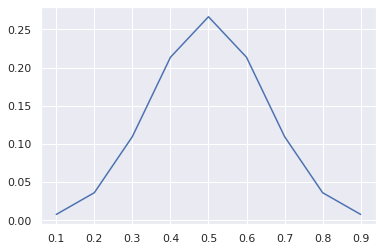

In [22]:
theta = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

m = 0.5 # mean
s = 0.15 # standard deviation

# x = np.linspace(norm.ppf(0.001, loc=m, scale=s), norm.ppf(0.999, loc=m, scale=s), 100)
# y = norm.pdf(x, loc=m, scale=s)
# z = y/sum(y)
# plt.plot(x,z)

y = norm.pdf(theta, loc=m, scale=s)
prior = y/sum(y)
plt.plot(theta,prior)



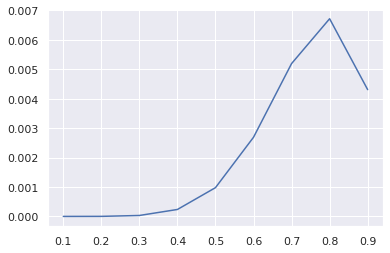

In [23]:
H = 8
T = 2
likelihood = theta**H * (1-theta)**T
plt.plot(theta,likelihood)

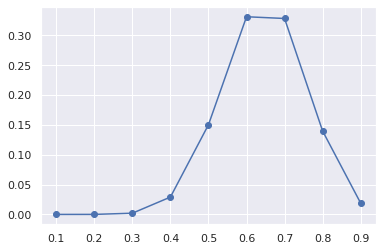

In [24]:
prior_like = prior * likelihood
posterior = prior_like/np.sum(prior_like)

plt.plot(theta,posterior,'-o')

Text(0.5, 0, '$\\theta$')

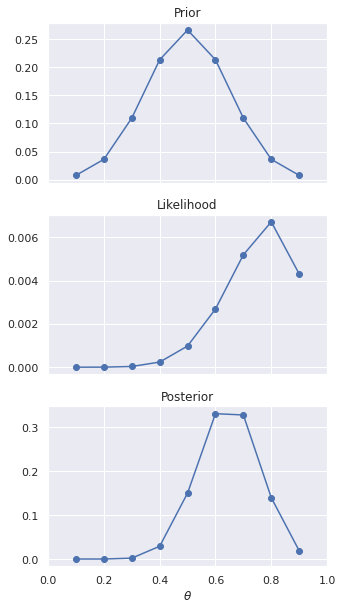

In [25]:
    fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, figsize=(5,10))
    
    ax1.plot(theta,prior,'-o')
    ax1.set_title('Prior')
    ax2.plot(theta,likelihood,'-o')
    ax2.set_title('Likelihood')
    ax3.plot(theta,posterior,'-o')
    ax3.set_title('Posterior')
    ax3.set_xlim(0,1)
    ax3.set_xlabel(r'$\theta$')

In [26]:
HHHHT = 0.25**4 * 0.75**1
glue('HHHHT',HHHHT, display=False)
HHHHT

0.0029296875

In [27]:
theta = np.array([0.25, 0.5, 0.75])

:::{list-table} Caption goes here 
:header-rows: 1
:widths: auto
:name: <table name>

* - $\theta$
  - 0.25
  - 0.5
  - 0.75
  - Sum
* - Prior
  - 0.10
  - 0.60
  - 0.30
  - 1.00
* - Likelihood
  - 2.93e-03
  - 3.12e-02
  - 7.91e-02
  - 1.13e-01
* - Prior x Likelihood
  - 2.9e-04
  - 1.9e-02
  - 2.4e-02
  - 4.3e-02
* - Posterior
  - 0.01
  - 0.44
  - 0.55
  - 1.00
:::


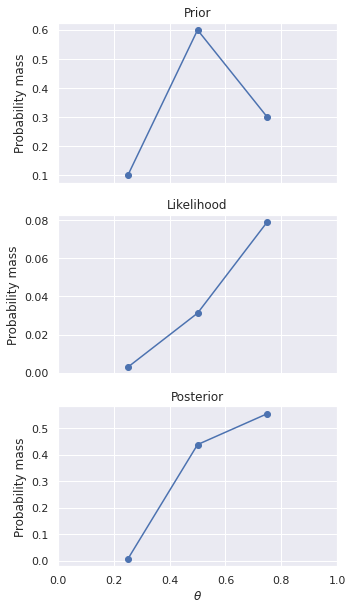

In [28]:
H = 4
T = 1

prior = np.array([0.1,0.6,0.3])

post1 = gridMethod(theta, prior, H, T, 'small-theta-first')

:::{list-table} Caption goes here 
:header-rows: 1
:widths: auto
:name: <table name>

* - $\theta$
  - 0.25
  - 0.5
  - 0.75
  - Sum
* - Prior
  - 0.01
  - 0.44
  - 0.55
  - 1.00
* - Likelihood
  - 2.93e-03
  - 3.12e-02
  - 7.91e-02
  - 1.13e-01
* - Prior x Likelihood
  - 2.0e-05
  - 1.4e-02
  - 4.4e-02
  - 5.8e-02
* - Posterior
  - 0.00
  - 0.24
  - 0.76
  - 1.00
:::


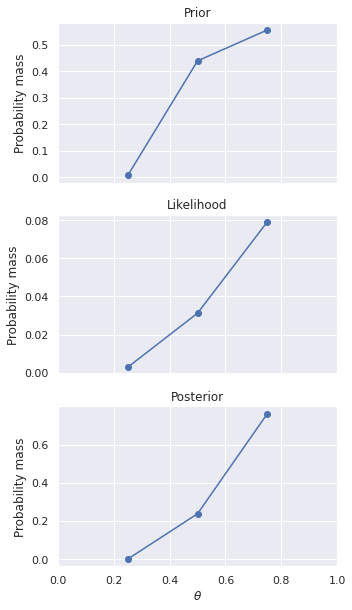

In [29]:
H = 4
T = 1

prior = post1

gridMethod(theta, prior, H, T, 'small-theta-second');


In [30]:
theta = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

:::{list-table} Caption goes here 
:header-rows: 1
:widths: auto
:name: <table name>

* - $\theta$
  - 0.1
  - 0.2
  - 0.3
  - 0.4
  - 0.5
  - 0.6
  - 0.7
  - 0.8
  - 0.9
  - Sum
* - Prior
  - 0.01
  - 0.04
  - 0.11
  - 0.21
  - 0.27
  - 0.21
  - 0.11
  - 0.04
  - 0.01
  - 1.00
* - Likelihood
  - 9.00e-05
  - 1.28e-03
  - 5.67e-03
  - 1.54e-02
  - 3.12e-02
  - 5.18e-02
  - 7.20e-02
  - 8.19e-02
  - 6.56e-02
  - 3.25e-01
* - Prior x Likelihood
  - 6.9e-07
  - 4.6e-05
  - 6.2e-04
  - 3.3e-03
  - 8.3e-03
  - 1.1e-02
  - 7.9e-03
  - 3.0e-03
  - 5.0e-04
  - 3.5e-02
* - Posterior
  - 0.00
  - 0.00
  - 0.02
  - 0.09
  - 0.24
  - 0.32
  - 0.23
  - 0.09
  - 0.01
  - 1.00
:::


Probability theta > 0.5: 0.6461021583638344


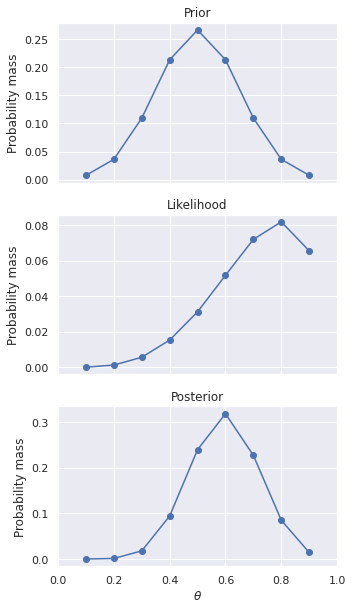

In [31]:
H = 4
T = 1
m = 0.5 # mean
s = 0.15 # standard deviation


y = norm.pdf(theta, loc=m, scale=s)
prior = y/sum(y)

post2 = gridMethod(theta, prior, H, T, 'large-theta-first');

p_gt_50 = sum(post2[5:9])
glue('p_gt_50',p_gt_50, display=False)
print(f"Probability theta > 0.5: {p_gt_50}")

In [32]:
sum(post2[5:9])

0.6461021583638344

:::{list-table} Caption goes here 
:header-rows: 1
:widths: auto
:name: <table name>

* - $\theta$
  - 0.1
  - 0.2
  - 0.3
  - 0.4
  - 0.5
  - 0.6
  - 0.7
  - 0.8
  - 0.9
  - Sum
* - Prior
  - 0.00
  - 0.00
  - 0.02
  - 0.09
  - 0.24
  - 0.32
  - 0.23
  - 0.09
  - 0.01
  - 1.00
* - Likelihood
  - 9.00e-05
  - 1.28e-03
  - 5.67e-03
  - 1.54e-02
  - 3.12e-02
  - 5.18e-02
  - 7.20e-02
  - 8.19e-02
  - 6.56e-02
  - 3.25e-01
* - Prior x Likelihood
  - 1.8e-09
  - 1.7e-06
  - 1.0e-04
  - 1.5e-03
  - 7.5e-03
  - 1.7e-02
  - 1.6e-02
  - 7.0e-03
  - 9.4e-04
  - 5.0e-02
* - Posterior
  - 0.00
  - 0.00
  - 0.00
  - 0.03
  - 0.15
  - 0.33
  - 0.33
  - 0.14
  - 0.02
  - 1.00
:::


Probability theta > 0.5: 0.8184875735348761


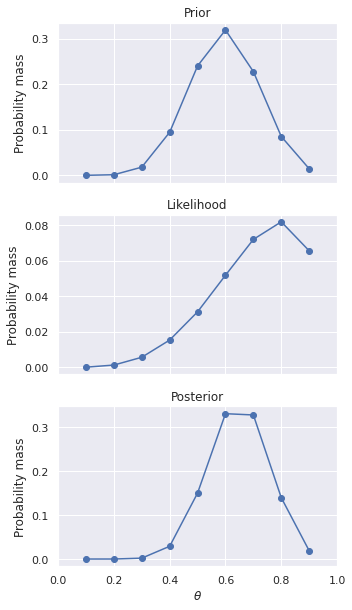

In [33]:
H = 4
T = 1

prior = post2

post3 = gridMethod(theta, prior, H, T,'large-theta-extra');

p_gt_50_extra = sum(post3[5:9])
glue('p_gt_50_extra',p_gt_50_extra, display=False)
print(f"Probability theta > 0.5: {p_gt_50_extra}")

:::{list-table} Caption goes here 
:header-rows: 1
:widths: auto
:name: <table name>

* - $\theta$
  - 0.1
  - 0.2
  - 0.3
  - 0.4
  - 0.5
  - 0.6
  - 0.7
  - 0.8
  - 0.9
  - Sum
* - Prior
  - 0.11
  - 0.11
  - 0.11
  - 0.11
  - 0.11
  - 0.11
  - 0.11
  - 0.11
  - 0.11
  - 1.00
* - Likelihood
  - 8.10e-09
  - 1.64e-06
  - 3.21e-05
  - 2.36e-04
  - 9.77e-04
  - 2.69e-03
  - 5.19e-03
  - 6.71e-03
  - 4.30e-03
  - 2.01e-02
* - Prior x Likelihood
  - 9.0e-10
  - 1.8e-07
  - 3.6e-06
  - 2.6e-05
  - 1.1e-04
  - 3.0e-04
  - 5.8e-04
  - 7.5e-04
  - 4.8e-04
  - 2.2e-03
* - Posterior
  - 0.00
  - 0.00
  - 0.00
  - 0.01
  - 0.05
  - 0.13
  - 0.26
  - 0.33
  - 0.21
  - 1.00
:::


Probability theta > 0.5: 0.938111272459749


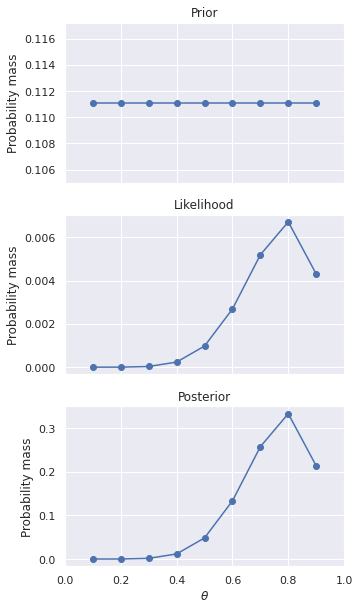

In [34]:
H = 8
T = 2

y = np.array(9*[1/9])
prior = y/sum(y)

post4 = gridMethod(theta, prior, H, T, 'large-theta-uniform');

p_gt_50_uniform = sum(post4[5:9])
glue('p_gt_50_uniform',p_gt_50_extra, display=False)
print(f"Probability theta > 0.5: {p_gt_50_uniform}")

:::{list-table} Caption goes here 
:header-rows: 1
:widths: auto
:name: <table name>

* - $\theta$
  - 0.1
  - 0.2
  - 0.3
  - 0.4
  - 0.5
  - 0.6
  - 0.7
  - 0.8
  - 0.9
  - Sum
* - Prior
  - 0.00
  - 0.00
  - 0.00
  - 0.11
  - 0.79
  - 0.11
  - 0.00
  - 0.00
  - 0.00
  - 1.00
* - Likelihood
  - 8.10e-09
  - 1.64e-06
  - 3.21e-05
  - 2.36e-04
  - 9.77e-04
  - 2.69e-03
  - 5.19e-03
  - 6.71e-03
  - 4.30e-03
  - 2.01e-02
* - Prior x Likelihood
  - 8.1e-23
  - 2.0e-14
  - 8.5e-09
  - 2.5e-05
  - 7.7e-04
  - 2.9e-04
  - 1.4e-06
  - 8.0e-11
  - 4.3e-17
  - 1.1e-03
* - Posterior
  - 0.00
  - 0.00
  - 0.00
  - 0.02
  - 0.71
  - 0.26
  - 0.00
  - 0.00
  - 0.00
  - 1.00
:::


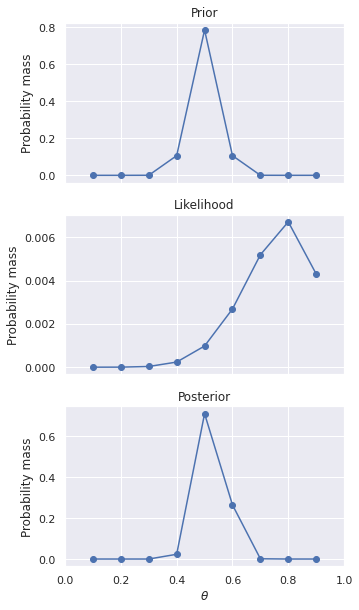

In [35]:
H = 8
T = 2
m = 0.5 # mean
s = 0.05 # standard deviation


y = norm.pdf(theta, loc=m, scale=s)
prior = y/sum(y)

gridMethod(theta, prior, H, T, 'large-theta-skeptical');

:::{list-table} Caption goes here 
:header-rows: 1
:widths: auto
:name: <table name>

* - $\theta$
  - 0.0
  - 0.010101010101010102
  - 0.020202020202020204
  - 0.030303030303030304
  - 0.04040404040404041
  - 0.05050505050505051
  - 0.06060606060606061
  - 0.07070707070707072
  - 0.08080808080808081
  - 0.09090909090909091
  - 0.10101010101010102
  - 0.11111111111111112
  - 0.12121212121212122
  - 0.13131313131313133
  - 0.14141414141414144
  - 0.15151515151515152
  - 0.16161616161616163
  - 0.17171717171717174
  - 0.18181818181818182
  - 0.19191919191919193
  - 0.20202020202020204
  - 0.21212121212121213
  - 0.22222222222222224
  - 0.23232323232323235
  - 0.24242424242424243
  - 0.25252525252525254
  - 0.26262626262626265
  - 0.27272727272727276
  - 0.2828282828282829
  - 0.29292929292929293
  - 0.30303030303030304
  - 0.31313131313131315
  - 0.32323232323232326
  - 0.33333333333333337
  - 0.3434343434343435
  - 0.3535353535353536
  - 0.36363636363636365
  - 0.37373737373737376
  - 0

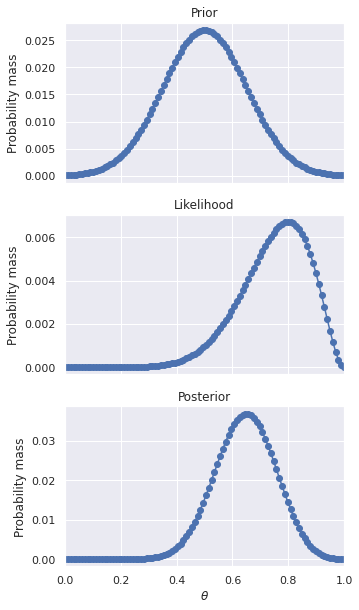

In [36]:
theta = np.linspace(0,1,100)
H = 8
T = 2
m = 0.5 # mean
s = 0.15 # standard deviation


y = norm.pdf(theta, loc=m, scale=s)
prior = y/sum(y)

gridMethod(theta, prior, H, T, 'very-large-theta-extra');


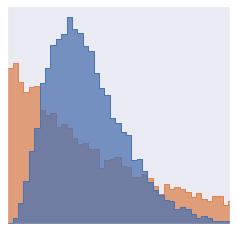

In [47]:
# Generate Favicon

# fig, ax = plt.subplots(1,1,figsize=(4,4))
# sns.histplot(df, ax=ax, element="step").set(xlim=(0,0.1));
# ax.get_yaxis().set_visible(False);
# ax.get_xaxis().set_visible(False);
# ax.get_legend().remove()
# fig.savefig('plot.png')